# Randomized Digital Nets Demo

In [5]:
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt
import time

### Getting started

In [6]:
dnet = qp.DigitalNetB2(generating_matrices= 21,seed=5,dimension = 5)
print(dnet)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       LMS_DS
    graycode        0
    entropy         5
    spawn_key       ()


In [7]:
dnet.gen_samples(8)

array([[0.27147386, 0.01536837, 0.7156664 , 0.03458861, 0.54832407],
       [0.33832503, 0.97099903, 0.63347943, 0.31887   , 0.0776063 ],
       [0.69949345, 0.37508043, 0.14570763, 0.12685636, 0.52158009],
       [0.62868066, 0.60731599, 0.18877059, 0.47268785, 0.10166473],
       [0.23592891, 0.84786627, 0.1824645 , 0.2396991 , 0.64706407],
       [0.18565189, 0.13454494, 0.23308771, 0.39122497, 0.22712775],
       [0.78919372, 0.73009733, 0.73750398, 0.08593079, 0.67378707],
       [0.85125249, 0.25628486, 0.6633808 , 0.29889233, 0.2030903 ]])

In [8]:
dnetcomp = qp.DigitalNetB2(dimension=5)
dnetcomp.gen_samples(8)

array([[0.45739491, 0.21571593, 0.23755278, 0.20766339, 0.5389488 ],
       [0.55130476, 0.54144236, 0.5347948 , 0.78905974, 0.13095059],
       [0.06392469, 0.79993335, 0.91089568, 0.51114361, 0.93336026],
       [0.90784861, 0.44303426, 0.36341048, 0.49238508, 0.27560071],
       [0.27621502, 0.71434992, 0.482607  , 0.06953061, 0.63185865],
       [0.74419578, 0.04488356, 0.81134298, 0.9261855 , 0.03802557],
       [0.14057232, 0.30149679, 0.68133677, 0.64941223, 0.77650856],
       [0.8585371 , 0.93963976, 0.10284589, 0.35512336, 0.4324373 ]])

### Comparison between randomized digital net and default digital net 

In [9]:
dnet2 = qp.DigitalNetB2(dimension = 2, generating_matrices= 15, seed = 19)
dnetcomp2 = qp.DigitalNetB2(dimension = 2)

Randomized = dnet2.gen_samples(64)
Default = dnetcomp2.gen_samples(64)

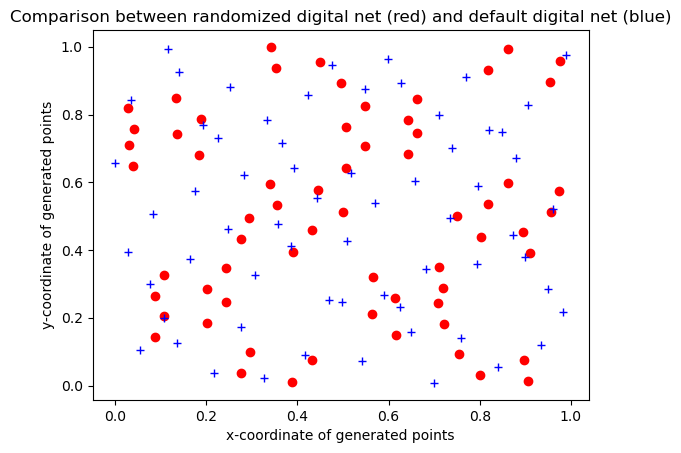

In [10]:
plt.plot(Randomized[:,0],Randomized[:,1],'ro',Default[:,0],Default[:,1],'b+')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.title("Comparison between randomized digital net (red) and default digital net (blue)")
plt.show()

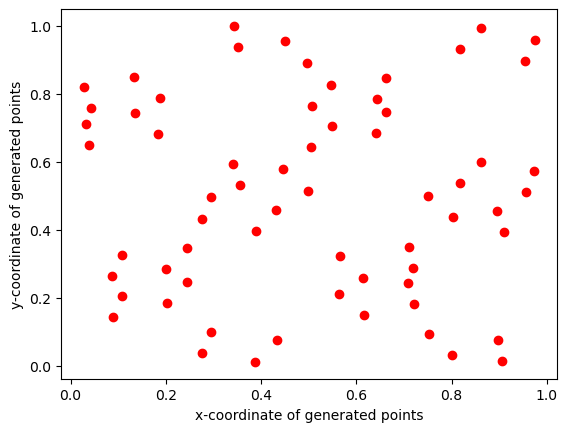

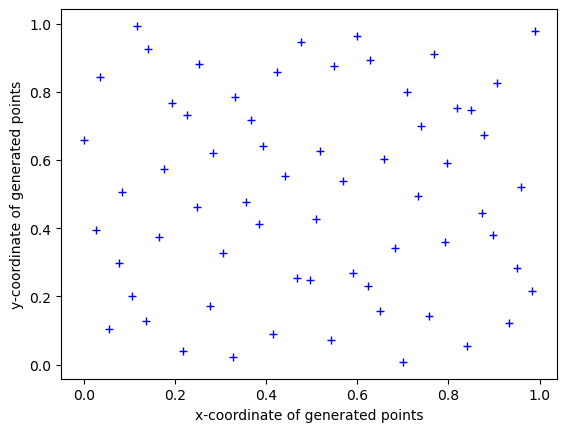

In [11]:
plt.plot(Randomized[:,0],Randomized[:,1],'ro')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.show()
plt.plot(Default[:,0],Default[:,1],'b+')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.show()

## Integration

### Sample Integration  

In [40]:
d =10 
tol = 1e-3
dnet = qp.DigitalNetB2(dimension = d, generating_matrices= 25)
gaussian_lattice = qp.Gaussian(dnet,mean = 0, covariance=1/2)
dnetcomp = qp.DigitalNetB2(d)
gaussian_lattice_comp = qp.Gaussian(dnetcomp,mean = 0,covariance = 1/2)



In [41]:
solution_random,data_random = qp.CubQMCNetG(qp.Keister(gaussian_lattice),abs_tol = tol).integrate()
solution_default,data_default = qp.CubQMCNetG(qp.Keister(gaussian_lattice_comp),abs_tol= tol).integrate()
print("Integration data from a randomized digital net")
print(data_random)
print("\nIntegration data from the default digital net")
print(data_default)


Integration data from a randomized digital net
LDTransformData (AccumulateData Object)
    solution        -154.191
    comb_bound_low  -154.192
    comb_bound_high -154.191
    comb_flags      1
    n_total         2^(23)
    n               2^(23)
    time_integrate  41.867
CubQMCNetG (StoppingCriterion Object)
    abs_tol         0.001
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
Keister (Integrand Object)
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
    transform       Gaussian (TrueMeasure Object)
                       mean            0
                       covariance      2^(-1)
                       decomp_type     PCA
DigitalNetB2 (DiscreteDistribution Object)
    d               10
    dvec            [0 1 2 3 4 5 6 7 8 9]
    randomize       LMS_DS
    graycode        0
    entropy         335223719470168145229458302031177139014
    spawn_key       ()

Integration data from the defaul

In [37]:
answer = qp.Keister(dnet).exact_integ(10)
print(f"Difference between randomized digital net results and exact answer {0}".format(abs(answer-solution_random)))
print(f"Difference between default digital net results and exact answer {0}".format(abs(answer-solution_default)))

Difference between randomized digital net results and exact answer 0
Difference between default digital net results and exact answer 0


### Error comparison between mean of means and median of means

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


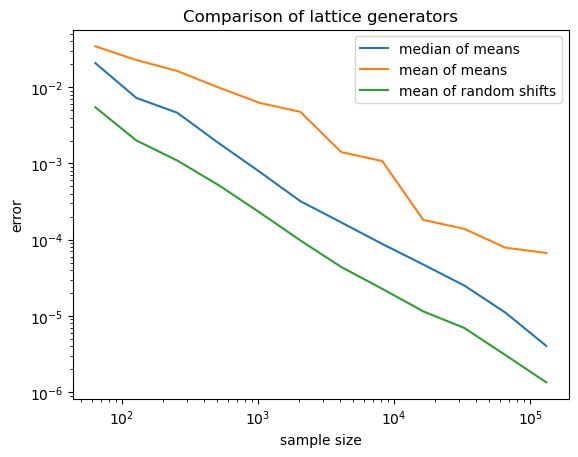

In [24]:
#mean of means vs. median of means

d = 2
N_min = 6
N_max = 18
N_list = 2**np.arange(N_min,N_max)
r = 11
num_trials = 25


error_median = np.zeros(N_max - N_min) 
error_mean = np.zeros(N_max - N_min) 
error_mean_onegen = np.zeros(N_max - N_min) 
for i in range(num_trials):
    y_median = []
    y_mean = []
    y_mean_one_gen = []
    print(i)
    list_of_keister_objects_random = []
    list_of_keister_objects_default = []
    y_randomized_list = []
    y_default_list = []
    for k in range(r):
        dnet = qp.DigitalNetB2(generating_matrices = 26,dimension=d)
        keister = qp.Keister(dnet)
        list_of_keister_objects_random.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)
        y_randomized_list.append(y)
        keister = qp.Keister(qp.DigitalNetB2(d))
        list_of_keister_objects_default.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)    
        y_default_list.append(y) 
            
    for N in N_list:

        y_median.append(np.median([np.mean(y[:N]) for y in y_randomized_list]))
        y_mean_one_gen.append(np.mean([np.mean(y[:N]) for y in y_default_list]))
        y_mean.append(np.mean([np.mean(y[:N]) for y in y_randomized_list]))

    answer = keister.exact_integ(d)
    error_median += abs(answer-y_median)
    error_mean += abs(answer-y_mean)
    error_mean_onegen += abs(answer-y_mean_one_gen)

error_median /= num_trials
error_mean /= num_trials
error_mean_onegen /= num_trials

plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.loglog(N_list,error_mean_onegen,label = "mean of random shifts")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title("Comparison of lattice generators")
plt.legend()
plt.savefig("./meanvsmedian.png")

